In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Data/13000_triv_nontriv_spdf_binary.csv')
pt=pd.read_csv('Data/PeriodicTablesdpf.csv')

In [3]:
data.head()

,NoE,Stoich. Formula,SG,Top_Class,split,feat_vector,s_bin,p_bin,d_bin,f_bin,...,F_mean,F_var,row_mean,row_var,col_mean,col_var,en_mean,en_var,rad_mean,rad_var
0,72.0,S1Ta6,2,2,"['S', 'Ta', 'Ta', 'Ta', 'Ta', 'Ta', 'Ta']","[2.0, 0.0, 0.5714285714285714, 1.3997084244475...",1,1,1,1,...,12.0,4.898979,5.571429,1.049781,20.571429,3.849198,1.654286,0.377921,1.957143,0.349927
1,116.0,P3Tc2,2,2,"['P', 'P', 'P', 'Tc', 'Tc']","[2.0, 0.0, 1.8, 1.469693845669907, 2.0, 2.4494...",1,1,1,0,...,0.0,0.000000,3.800000,0.979796,25.800000,3.919184,2.074000,0.142070,1.520000,0.391918
2,158.0,O9V5,2,2,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[2.0, 0.0, 2.5714285714285716, 1.9166296949998...",1,1,1,0,...,0.0,0.000000,2.714286,0.958315,26.071429,5.270732,2.793571,0.867275,1.096429,0.598947
3,154.0,O9P3Ru1,2,2,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[2.0, 0.0, 3.4615384615384617, 1.0824036368823...",1,1,1,0,...,0.0,0.000000,2.461538,0.842650,29.153846,2.106625,3.056154,0.575774,0.873077,0.374482
4,124.0,O7V4,2,2,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'V', 'V', ...","[2.0, 0.0, 2.5454545454545454, 1.9241827716833...",1,1,1,0,...,0.0,0.000000,2.727273,0.962091,26.000000,5.291503,2.781818,0.870693,1.104545,0.601307


In [4]:
data.isna().sum()

NoE                  0
Stoich. Formula      0
SG                   0
Top_Class            0
split                0
feat_vector          0
s_bin                0
p_bin                0
d_bin                0
f_bin                0
S_mean               0
S_var                0
P_mean               0
P_var                0
D_mean               0
D_var                0
F_mean               0
F_var                0
row_mean             0
row_var              0
col_mean             0
col_var              0
en_mean              0
en_var               0
rad_mean           381
rad_var            381
dtype: int64

In [5]:
data.dropna(axis=0, how='all',inplace=True)

In [6]:
data.isna().sum()

NoE                  0
Stoich. Formula      0
SG                   0
Top_Class            0
split                0
feat_vector          0
s_bin                0
p_bin                0
d_bin                0
f_bin                0
S_mean               0
S_var                0
P_mean               0
P_var                0
D_mean               0
D_var                0
F_mean               0
F_var                0
row_mean             0
row_var              0
col_mean             0
col_var              0
en_mean              0
en_var               0
rad_mean           381
rad_var            381
dtype: int64

In [7]:
y=data['Top_Class']
x=data.drop(['split','Stoich. Formula','feat_vector','rad_mean','rad_var','Top_Class'],axis=1)

In [8]:
# import numpy as np
# import pandas as pd
# from sklearn import tree
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion':['gini','entropy'],'max_depth':range(3,10)}
# clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=15)
# clf.fit(X=x, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

In [9]:
x

,NoE,SG,s_bin,p_bin,d_bin,f_bin,S_mean,S_var,P_mean,P_var,D_mean,D_var,F_mean,F_var,row_mean,row_var,col_mean,col_var,en_mean,en_var
0,72.0,2,1,1,1,1,2.0,0.0,0.571429,1.399708,2.571429,1.049781,12.0,4.898979,5.571429,1.049781,20.571429,3.849198,1.654286,0.377921
1,116.0,2,1,1,1,0,2.0,0.0,1.800000,1.469694,2.000000,2.449490,0.0,0.000000,3.800000,0.979796,25.800000,3.919184,2.074000,0.142070
2,158.0,2,1,1,1,0,2.0,0.0,2.571429,1.916630,1.071429,1.437472,0.0,0.000000,2.714286,0.958315,26.071429,5.270732,2.793571,0.867275
3,154.0,2,1,1,1,0,2.0,0.0,3.461538,1.082404,0.461538,1.598816,0.0,0.000000,2.461538,0.842650,29.153846,2.106625,3.056154,0.575774
4,124.0,2,1,1,1,0,2.0,0.0,2.545455,1.924183,1.090909,1.443137,0.0,0.000000,2.727273,0.962091,26.000000,5.291503,2.781818,0.870693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,48.0,160,1,1,0,0,2.0,0.0,1.428571,0.494872,0.000000,0.000000,0.0,0.000000,2.571429,0.494872,27.428571,0.494872,2.012857,0.465179
13139,84.0,160,1,1,1,0,2.0,0.0,2.571429,1.678191,1.428571,3.499271,0.0,0.000000,3.142857,0.349927,28.571429,1.678191,2.170000,0.473588
13140,76.0,160,1,1,1,0,2.0,0.0,2.571429,1.678191,0.857143,2.099563,0.0,0.000000,3.142857,0.349927,28.000000,2.777460,2.195714,0.448899
13141,68.0,160,1,1,1,0,2.0,0.0,3.000000,1.549193,1.800000,3.600000,0.0,0.000000,2.600000,1.200000,28.800000,1.939072,3.058000,0.584890


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=dt.predict(X_test)

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7630277672118676


Feature: 0, Score: 0.20584
Feature: 1, Score: 0.15171
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00060
Feature: 4, Score: 0.00610
Feature: 5, Score: 0.00227
Feature: 6, Score: 0.01261
Feature: 7, Score: 0.00628
Feature: 8, Score: 0.05817
Feature: 9, Score: 0.04160
Feature: 10, Score: 0.04377
Feature: 11, Score: 0.06487
Feature: 12, Score: 0.04099
Feature: 13, Score: 0.03392
Feature: 14, Score: 0.03788
Feature: 15, Score: 0.03686
Feature: 16, Score: 0.07094
Feature: 17, Score: 0.05713
Feature: 18, Score: 0.05744
Feature: 19, Score: 0.07100


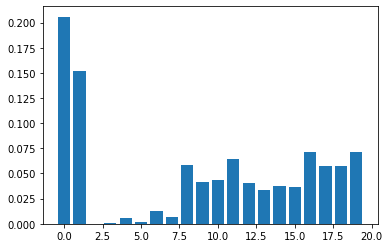

In [14]:
importance = dt.feature_importances_
import matplotlib.pyplot
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#features = []


parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.42424928484709534 {'max_depth': 4}


In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
y_prerf=rf.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_test, y_prerf))

0.4469379992392545


In [19]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(out_file='tree.dot', 
#                 feature_names = ['NoE','SG','s_bin','p_bin','d_bin','f_bin'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [27]:
import xgboost as xgb
params = {'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}
xgbo = xgb.XGBClassifier(**params)
xgbo.fit(X_train, y_train)

[11:09:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_prexg=xgbo.predict(X_test)
print(metrics.accuracy_score(y_test, y_prexg))

0.6192468619246861


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

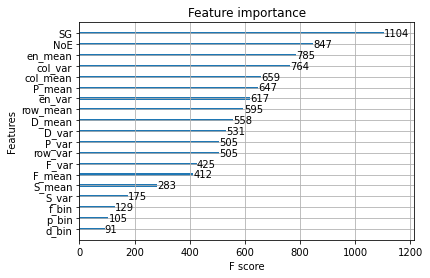

In [29]:
from xgboost import plot_importance
plot_importance(xgbo, )